<a href="https://colab.research.google.com/github/kaitoyama/enigmaBombe/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U networkx
!apt install graphviz libgraphviz-dev
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get

In [2]:
import networkx as nx
import itertools
import tqdm

In [3]:
roter_1=["R",['E', 'K', 'M', 'F', 'L', 'G', 'D', 'Q', 'V', 'Z', 'N', 'T', 'O', 'W', 'Y', 'H', 'X', 'U', 'S', 'P', 'A', 'I', 'B', 'R', 'C', 'J']]
roter_2=["F",['A', 'J', 'D', 'K', 'S', 'I', 'R', 'U', 'X', 'B', 'L', 'H', 'W', 'T', 'M', 'C', 'Q', 'G', 'Z', 'N', 'P', 'Y', 'F', 'V', 'O', 'E']]
roter_3=["W",['B', 'D', 'F', 'H', 'J', 'L', 'C', 'P', 'R', 'T', 'X', 'V', 'Z', 'N', 'Y', 'E', 'I', 'W', 'G', 'A', 'K', 'M', 'U', 'S', 'Q', 'O']]
UKW_B=['Y', 'R', 'U', 'H', 'Q', 'S', 'L', 'D', 'P', 'X', 'N', 'G', 'O', 'K', 'M', 'I', 'E', 'B', 'F', 'Z', 'C', 'W', 'V', 'J', 'A', 'T']

In [4]:
def alphabet2num(alphabet: str):
    upperAlpha=alphabet.upper()
    return(ord(upperAlpha)-65)

def num2alphabet(num: int):
    return(chr(num+65))

def num2alpha(num: int):
    if num<=26:
        return chr(64+num)
    elif num%26==0:
        return num2alpha(num//26-1)+chr(90)
    else:
        return num2alpha(num//26)+chr(64+num%26)

In [5]:
def justify(order: int):
    if 0<=order<26:
        return order
    elif order<0:
        while order<0:
            order+=26
        return order
    else:
        while 25<order:
            order-=26
        return order

In [6]:
def enigmaEncode(input: str,roter: list,position: list,Ringstellung: list,offset=0):
    enc=[]
    secondTurn=0
    thirdTurn=0
    if offset>0:
        for i in range(offset):
            firstDif=justify(alphabet2num(position[0])+alphabet2num(Ringstellung[0])+i)
            if justify(alphabet2num(position[0])+i)==alphabet2num(roter[0][0]):
                secondTurn+=1
            secondDif=justify(alphabet2num(position[1])+alphabet2num(Ringstellung[1])+secondTurn)
            if justify(alphabet2num(position[1])+secondTurn)==alphabet2num(roter[1][0]):
                thirdTurn+=1
    elif offset<0:
        for i in range(abs(offset)):
            firstDif=justify(alphabet2num(position[0])+alphabet2num(Ringstellung[0])-i)
            if justify(alphabet2num(position[0])-i)==alphabet2num(roter[0][0]):
                secondTurn-=1
            secondDif=justify(alphabet2num(position[1])+alphabet2num(Ringstellung[1])+secondTurn)
            if justify(alphabet2num(position[1])+secondTurn)==alphabet2num(roter[1][0]):
                thirdTurn-=1
    for i in range(len(input)):
        current=input[i]
        i+=1
        firstDif=justify(alphabet2num(position[0])+alphabet2num(Ringstellung[0])+offset+i)
        if justify(alphabet2num(position[0])+offset+i)==alphabet2num(roter[0][0]):
            secondTurn+=1
        secondDif=justify(alphabet2num(position[1])+alphabet2num(Ringstellung[1])+secondTurn)
        if justify(alphabet2num(position[1])+secondTurn)==alphabet2num(roter[1][0]):
            thirdTurn+=1       
        thirdDif=justify(alphabet2num(position[2])+alphabet2num(Ringstellung[2])+thirdTurn)
        current=roter[0][1][justify(alphabet2num(current)+firstDif)]
        current=roter[1][1][justify(alphabet2num(current)+secondDif)]
        current=roter[2][1][justify(alphabet2num(current)+thirdDif)]
        current=UKW_B[alphabet2num(current)]
        current=num2alphabet(justify(roter[2][1].index(current)-thirdDif))
        current=num2alphabet(justify(roter[1][1].index(current)-secondDif))
        current=num2alphabet(justify(roter[0][1].index(current)-firstDif))
        enc.append(current)
    return("".join(enc))

In [49]:
enigmaEncode("CONSEQUATINVIDUNTREBUMLUPTATUMVULPUTATESITLOREMREBUMFACILISISSANCTUSLABORESEALOREMTEMPORLOREMKASDDOLORDOLORSEDCONSECTETUER",[roter_2,roter_1,roter_3],["J","A","J"],["A","A","B"])

'KCBKMISSGCMBHVCVPZFAHONZQVFRPHAZQKLKFOANDWHJPIJJUOQZWBKVEMFBITKAGIBOMWHKELANECWKXXRAFHGGNVSDBRBOFVZOUKFDRVQFRQPBAUXRMYARKE'

In [50]:
enc = "KCBKMISSGCMBHVCVPZFAHONZQVFRPHAZQKLKFOANDWHJPIJJUOQZWBKVEMFBITKAGIBOMWHKELANECWKXXRAFHGGNVSDBRBOFVZOUKFDRVQFRQPBAUXRMYARKE"#@param {type:"string"}
plain="CONSEQUATINVIDUNTREBUMLUPTATUMVULPUTATESITLOREMREBUMFACILISISSANCTUSLABORESEALOREMTEMPORLOREMKASDDOLORDOLORSEDCONSECTETUER"#@param{type:"string"}

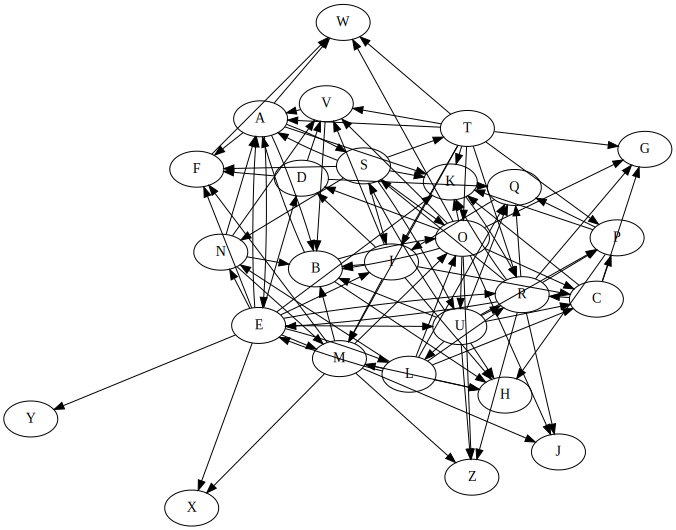

In [51]:
from IPython.display import SVG, display

G = nx.DiGraph()
crib_list=[plain,enc]
for i in range(len(crib_list[0])):
    nx.add_path(G, [crib_list[0][i],crib_list[1][i]],weight=i+1)

svg = SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg'))
display(svg)

In [52]:
cycleList=sorted(nx.simple_cycles(G))

In [53]:
checker=0
for i in range(len(cycleList)):
    if len(cycleList[checker])<len(cycleList[i]):
        checker=i
maxCycle=cycleList[checker]

In [54]:
maxCycle

['Q',
 'I',
 'C',
 'K',
 'R',
 'E',
 'U',
 'L',
 'N',
 'M',
 'B',
 'O',
 'D',
 'V',
 'A',
 'S',
 'T',
 'P']

In [55]:
weightList=[]
for i in range(len(maxCycle)):
    target=sorted(G.edges(maxCycle[i],data=True))
    if i!=len(maxCycle)-1:
        for j in range(len(target)):
            if target[j][1]==maxCycle[i+1]:
                break
        print(maxCycle[i],maxCycle[i+1],target[j][2]["weight"])
        weightList.append(target[j][2]["weight"])
    else:
        for j in range(len(target)):
            if target[j][1]==maxCycle[0]:
                break
        print(maxCycle[i],maxCycle[0],target[j][2]["weight"])
        weightList.append(target[j][2]["weight"])

Q I 6
I C 10
C K 55
K R 94
R E 122
E U 49
U L 35
L N 89
N M 11
M B 93
B O 50
O D 104
D V 98
V A 31
A S 8
S T 62
T P 17
P Q 25


In [56]:
list(itertools.permutations([1, 2, 3]))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [57]:
roterSetList=list(itertools.permutations([roter_1, roter_2, roter_3]))
minWeight=min(weightList)
relativeWeight = list(map(lambda x: x-minWeight, weightList))

In [58]:
relativeWeight

[0, 4, 49, 88, 116, 43, 29, 83, 5, 87, 44, 98, 92, 25, 2, 56, 11, 19]

In [59]:
def bombe(i):
    bang=0
    offset=26*27+1
    cycleLength=len(maxCycle)
    roter=roterSetList[i]
    for h in tqdm.tqdm(range(17576)):
        counter=offset+h
        position=list(num2alpha(counter))
        for j in range(17576):
            bang=1
            ring=list(num2alpha(offset+j))
            for k in range(cycleLength):
                if k!=cycleLength-1:
                    if enigmaEncode(maxCycle[k],roter,position,ring,relativeWeight[k])!=maxCycle[k+1]:
                        bang*=0
                else:
                    if enigmaEncode(maxCycle[k],roter,position,ring,relativeWeight[k])!=maxCycle[0]:
                        bang*=0
                if bang==0:
                    break
            if bang==1:
                print("Bang!!!",i,position,ring)
                bang=0
                return(i,position,ring)

In [60]:
i,position,ring=bombe(2)

 58%|█████▊    | 10140/17576 [39:27<28:55,  4.28it/s]

Bang!!! 2 ['P', 'A', 'A'] ['Z', 'A', 'K']


In [61]:
enigmaEncode(enc,roterSetList[i],position,ring,-minWeight+1)

'CONSEQUATINVIDUNTREBDMLUPTATUMVULPUTATESITLORENREBUMFACILISISSANCTUSLABOIESEALOREMTEMPORLOREMKASDDYLORDOLORSEDCONSECTETUER'